In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fs_df = pd.read_csv("bern_fs_df.csv", index_col=0)
ar_df = pd.read_csv("bern_ar_df.csv", index_col=0)

In [20]:
FS = 0
AR = 1
DIFF = 2

TIME = 0
NUM_ARMS = 1
ARM_DATA = 2
ARM_GAP = 3

def plot(plotType, xAxis, fix):
    fix_t, fix_K, fix_h, fix_d = fix

    fs_plotdata = fs_df
    ar_plotdata = ar_df
    if(fix_K != -1):
        fs_plotdata = fs_plotdata[fs_plotdata["NumArms"] == fix_K]
        ar_plotdata = ar_plotdata[ar_plotdata["NumArms"] == fix_K]
    if(fix_h != -1):
        fs_plotdata = fs_plotdata[fs_plotdata["ArmData"] == fix_h]
        ar_plotdata = ar_plotdata[ar_plotdata["ArmData"] == fix_h]
    if(fix_d != -1):
        fs_plotdata = fs_plotdata[fs_plotdata["ArmGap"] == fix_d]
        ar_plotdata = ar_plotdata[ar_plotdata["ArmGap"] == fix_d]
    
    if(xAxis == TIME):
        x = [str(t) for t in range(1, max_T + 1)]
        pass
        xlabel = "Time"
    elif(xAxis == NUM_ARMS):
        x = fs_plotdata["NumArms"]
        xlabel = "Number of Arms"
    elif(xAxis == ARM_DATA):
        x = fs_plotdata["ArmData"]
        xlabel = "Data per arm"
    else: #arm gap
        x = fs_plotdata["ArmGap"]
        xlabel = "Arm Gap"

    if(plotType == FS):
        y = fs_plotdata[str(fix_t)]
        ylabel = "Regret of FS"
    elif(plotType == AR):
        y = ar_plotdata[str(fix_t)]
        ylabel = "Regret of AR"
    else:
        y = fs_plotdata[str(fix_t)] - ar_plotdata[str(fix_t)]
        ylabel = "Regret Difference (FS - AR)"

    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

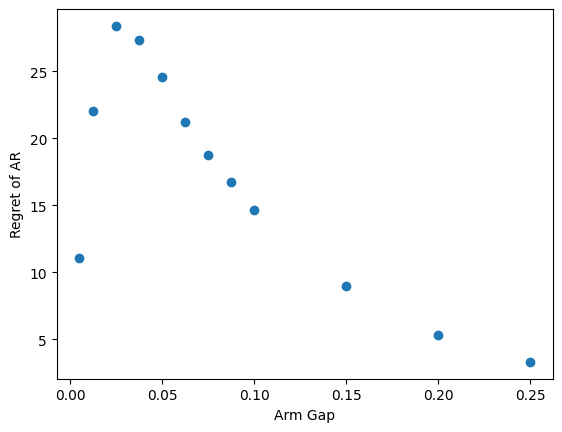

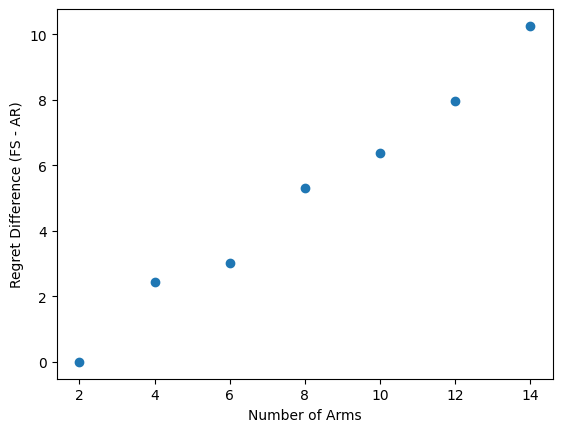

In [19]:
plot(AR, ARM_GAP, [5000, 2, 30, -1])
plt.figure()
plot(DIFF, NUM_ARMS, [5000, -1, 80, 0.2])

In [23]:
#GP PLOTTING
fs_gp = pd.read_csv("GP_fs_df.csv", index_col=0)
ar_gp = pd.read_csv("GP_ar_df.csv", index_col=0)

[500, [0, 0.5, 2, 0.02], [0, 2], np.int64(90), 0, 250, [50, 5]]


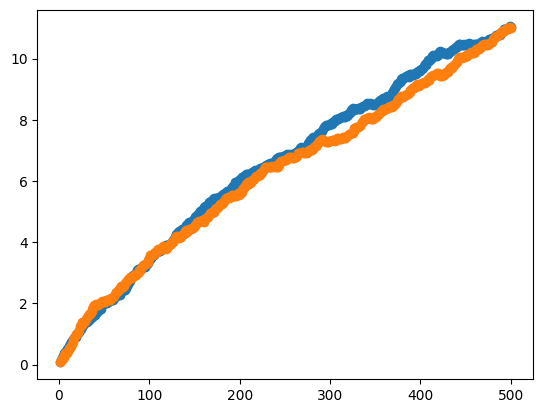

In [35]:
#temp
rowId = 8
task = fs_gp.loc[rowId]["Params"]
print(task)
#T, func, ar_type, data_pts, data_dist, num_samples, gp_params = task
T = 500
c = list(range(1, T + 1))
strc = [str(n) for n in c]
plt.scatter(c, fs_gp.loc[rowId][strc])
plt.scatter(c, ar_gp.loc[rowId][strc])